<a href="https://colab.research.google.com/github/techtricks1/echa/blob/main/handwritten%20digit%20recognition%20using%20transfer%20learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from IPython.display import display, HTML

display(HTML("""
<script src="https://cdn.jsdelivr.net/npm/@tensorflow/tfjs@3.10.0"></script>
"""))

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array
from IPython.display import display, HTML

# Resize and convert grayscale images to RGB
def preprocess_images(images, size=(32, 32)):
    images_rgb = np.zeros((images.shape[0], size[0], size[1], 3))
    for i in range(images.shape[0]):
        img = array_to_img(images[i])
        img = img.resize(size)
        img_rgb = img_to_array(img)
        images_rgb[i] = np.stack([img_rgb[:, :, 0]] * 3, axis=-1)
    return images_rgb / 255.0

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images_processed = preprocess_images(np.expand_dims(train_images, axis=-1))
test_images_processed = preprocess_images(np.expand_dims(test_images, axis=-1))
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Load the VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the convolutional layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model using the VGG16 base and add custom top layers
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Assuming 10 classes for digits 0 to 9

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images_processed, train_labels, epochs=1, batch_size=32, validation_data=(test_images_processed, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images_processed, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')

# Function to draw a number and recognize it
def draw_and_recognize(model):
    # Create an HTML element to embed the drawing canvas
    html = """
<canvas id="canvas" width="200" height="200" style="border:1px solid #000;"></canvas>
<br/>
<button onclick="clearCanvas()">Clear Canvas</button>
<button onclick="predictDigit()">Predict Digit</button>
<script>
  var canvas = document.getElementById('canvas');
  var ctx = canvas.getContext('2d');
  var mousePressed = false;

  canvas.addEventListener('mousedown', function (e) {
    mousePressed = true;
    draw(e.pageX - canvas.offsetLeft, e.pageY - canvas.offsetTop, false);
  });

  canvas.addEventListener('mousemove', function (e) {
    if (mousePressed) {
      draw(e.pageX - canvas.offsetLeft, e.pageY - canvas.offsetTop, true);
    }
  });

  canvas.addEventListener('mouseup', function () {
    mousePressed = false;
  });

  canvas.addEventListener('mouseleave', function () {
    mousePressed = false;
  });

  function draw(x, y, isDown) {
    if (isDown) {
      ctx.beginPath();
      ctx.arc(x, y, 5, 0, 2 * Math.PI);
      ctx.fillStyle = 'black';
      ctx.fill();
      ctx.closePath();
    }
  }

  function clearCanvas() {
    ctx.clearRect(0, 0, canvas.width, canvas.height);
  }

  function predictDigit() {
    var imgData = canvas.toDataURL();
    var img = new Image();
    img.src = imgData;
    img.onload = function () {
      var canvasElement = document.createElement('canvas');
      canvasElement.width = 28;
      canvasElement.height = 28;
      var context = canvasElement.getContext('2d');
      context.drawImage(img, 0, 0, 28, 28);

      // Convert image to grayscale
      var imageData = context.getImageData(0, 0, 28, 28).data;
      var inputArray = [];

      for (var i = 0; i < imageData.length; i += 4) {
        var grayscaleValue = (imageData[i] + imageData[i + 1] + imageData[i + 2]) / 3;
        inputArray.push(grayscaleValue / 255.0);
      }

      // Reshape inputArray to (1, 28, 28, 1)
      var reshapedInput = tf.tensor(inputArray).reshape([1, 28, 28, 1]);

      // Make predictions
      model.predict(reshapedInput).array().then(function(predictions) {
        // Convert predictions to class label
        var predictedLabel = predictions.argMax(axis=1).dataSync()[0];

        // Display the drawn image and predicted label
        var resultElement = document.createElement('div');
        resultElement.innerHTML = '<img src="' + imgData + '" style="margin-top: 10px;"/>'
          + '<p>Predicted Label: ' + predictedLabel + '</p>';
        document.body.appendChild(resultElement);
      });
    };
  }
</script>
"""


    # Display the HTML element
    display(HTML(html))

# Call the function with your trained model
draw_and_recognize(model)

 174/1875 [=>............................] - ETA: 12:54 - loss: 0.9260 - accuracy: 0.7200

313/313 [==============================] - 119s 382ms/step - loss: 0.1477 - accuracy: 0.9521
Test accuracy: 95.21%


313/313 [==============================] - 120s 384ms/step


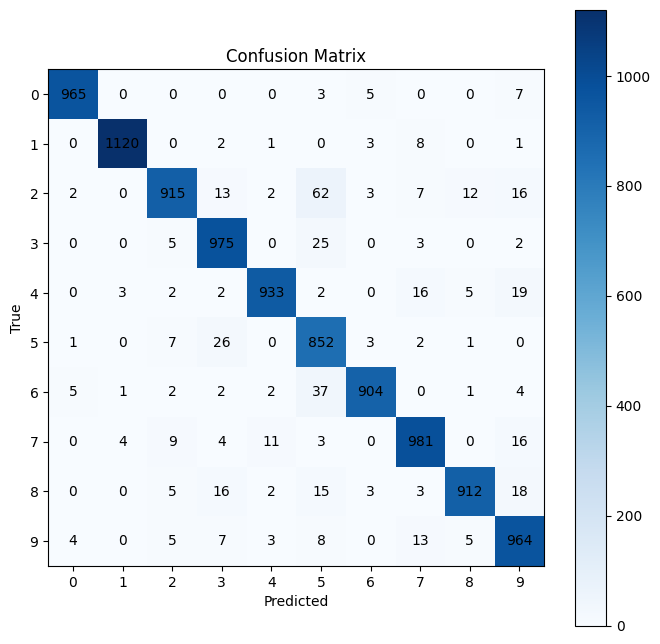

In [ ]:

import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array
from IPython.display import display, HTML
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Resize and convert grayscale images to RGB
def preprocess_images(images, size=(32, 32)):
    images_rgb = np.zeros((images.shape[0], size[0], size[1], 3))
    for i in range(images.shape[0]):
        img = array_to_img(images[i])
        img = img.resize(size)
        img_rgb = img_to_array(img)
        images_rgb[i] = np.stack([img_rgb[:, :, 0]] * 3, axis=-1)
    return images_rgb / 255.0

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images_processed = preprocess_images(np.expand_dims(train_images, axis=-1))
test_images_processed = preprocess_images(np.expand_dims(test_images, axis=-1))
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Load the VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the convolutional layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model using the VGG16 base and add custom top layers
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Assuming 10 classes for digits 0 to 9

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images_processed, train_labels, epochs=1, batch_size=32, validation_data=(test_images_processed, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images_processed, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')

# Function to draw a number and recognize it
def draw_and_recognize(model):
    # Create an HTML element to embed the drawing canvas
    html = """
    <canvas id="canvas" width="200" height="200" style="border:1px solid #000;"></canvas>
    <br/>
    <button onclick="clearCanvas()">Clear Canvas</button>
    <button onclick="predictDigit()">Predict Digit</button>
    <script>
      var canvas = document.getElementById('canvas');
      var ctx = canvas.getContext('2d');
      var mousePressed = false;

      canvas.addEventListener('mousedown', function (e) {
        mousePressed = true;
        draw(e.pageX - canvas.offsetLeft, e.pageY - canvas.offsetTop, false);
      });

      canvas.addEventListener('mousemove', function (e) {
        if (mousePressed) {
          draw(e.pageX - canvas.offsetLeft, e.pageY - canvas.offsetTop, true);
        }
      });

      canvas.addEventListener('mouseup', function () {
        mousePressed = false;
      });

      canvas.addEventListener('mouseleave', function () {
        mousePressed = false;
      });

      function draw(x, y, isDown) {
        if (isDown) {
          ctx.beginPath();
          ctx.arc(x, y, 5, 0, 2 * Math.PI);
          ctx.fillStyle = 'black';
          ctx.fill();
          ctx.closePath();
        }
      }

      function clearCanvas() {
        ctx.clearRect(0, 0, canvas.width, canvas.height);
      }

      function predictDigit() {
        var imgData = canvas.toDataURL();
        var img = new Image();
        img.src = imgData;
        img.onload = function () {
          var canvasElement = document.createElement('canvas');
          canvasElement.width = 28;
          canvasElement.height = 28;
          var context = canvasElement.getContext('2d');
          context.drawImage(img, 0, 0, 28, 28);

          // Convert image to grayscale
          var imageData = context.getImageData(0, 0, 28, 28).data;
          var inputArray = [];

          for (var i = 0; i < imageData.length; i += 4) {
            var grayscaleValue = (imageData[i] + imageData[i + 1] + imageData[i + 2]) / 3;
            inputArray.push(grayscaleValue / 255.0);
          }

          // Reshape inputArray to (1, 28, 28, 1)
          var reshapedInput = tf.tensor(inputArray).reshape([1, 28, 28, 1]);

          // Make predictions
          model.predict(reshapedInput).array().then(function(predictions) {
            // Convert predictions to class label
            var predictedLabel = predictions.argMax(axis=1).dataSync()[0];

            // Display the drawn image and predicted label
            var resultElement = document.createElement('div');
            resultElement.innerHTML = '<img src="' + imgData + '" style="margin-top: 10px;"/>'
              + '<p>Predicted Label: ' + predictedLabel + '</p>';
            document.body.appendChild(resultElement);
          });
        };
      }
    </script>
    """

    # Display the HTML element
    display(HTML(html))

# Call the function with your trained model
draw_and_recognize(model)

# Predict digits and show confusion matrix
predicted_labels = model.predict(test_images_processed).argmax(axis=1)
true_labels = np.argmax(test_labels, axis=1)
cm = confusion_matrix(true_labels, predicted_labels)

# Visualize confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(10):
    for j in range(10):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center')
plt.show()